Data shape after sampling: (147097, 36)


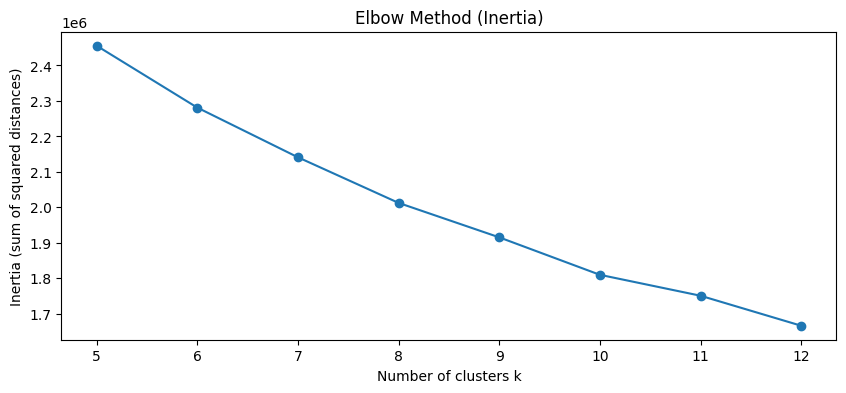

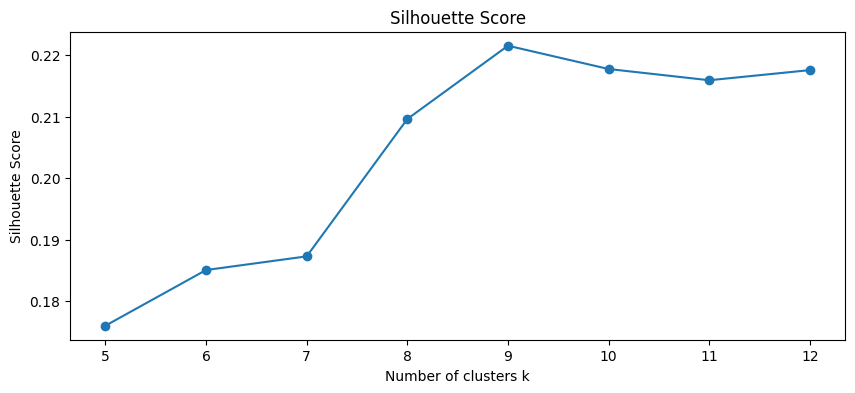

Best k based on silhouette: 9


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
# -----------------------------
# 1. Load your data
# -----------------------------
data_path = "../data/preprocessed/preprocessed_reduced_data_unsupervised.csv"
data_df = pd.read_csv(data_path)

# Remove the fire label
X_full = data_df.drop(columns=['fire'])

percentage = 0.20   # example: 30% of data
X_data = X_full.sample(frac=percentage, random_state=42)

print("Data shape after sampling:", X_data.shape)
# -----------------------------
# 3. Try multiple k values
# -----------------------------
K_values = range(5, 13)  # try k from 3 to 5
inertias = []
silhouette_scores = []

for k in K_values:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=5,
        max_iter=300,
        tol=1e-4,
        random_state=42
    )

    labels = kmeans.fit_predict(X_data)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_data, labels))

# -----------------------------
# 4. Plot the Elbow curve (inertia)
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(K_values, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (sum of squared distances)")
plt.show()

# -----------------------------
# 5. Plot Silhouette scores
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette Score")
plt.show()

# -----------------------------
# 6. Choose best k = k with:
#    - highest silhouette score
#    - or elbow point in inertia curve
# -----------------------------

best_k = K_values[np.argmax(silhouette_scores)]
print("Best k based on silhouette:", best_k)

# -----------------------------
# 7. Train final model with best k
# -----------------------------
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans_final.fit_predict(X_data)


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# 1. Load your data
# -----------------------------
data_path = "../data/preprocessed/preprocessed_reduced_data.csv"
data_df = pd.read_csv(data_path)

# Remove the fire label
X_full = data_df.drop(columns=['fire'])

# -----------------------------
# 2. Take only a percentage of your data
# -----------------------------
percentage = 0.30   # example: 30% of data
X_data = X_full.sample(frac=percentage, random_state=42)

print("Data shape after sampling:", X_data.shape)

# -----------------------------
# 3. Train KMeans with k=3
# -----------------------------
k = 3
kmeans = KMeans(
    n_clusters=k,
    init="k-means++",
    n_init=3,
    random_state=42
)

labels = kmeans.fit_predict(X_data)

# -----------------------------
# 4. Compute clustering metrics
# -----------------------------
silhouette = silhouette_score(X_data, labels)
davies_bouldin = davies_bouldin_score(X_data, labels)
calinski_harabasz = calinski_harabasz_score(X_data, labels)

print("\n--- Metrics for K=3 ---")
print(f"Silhouette Score       : {silhouette:.4f}  (higher is better)")
print(f"Davies-Bouldin Score   : {davies_bouldin:.4f}  (lower is better)")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}  (higher is better)")

# -----------------------------
# 5. Train final model (optional) on full data
# -----------------------------
kmeans_final = KMeans(n_clusters=3, random_state=42)
final_labels = kmeans_final.fit_predict(X_full)

print("\nCluster distribution on full data:")
print(np.bincount(final_labels))


Data shape after sampling: (220645, 40)

--- Metrics for K=3 ---
Silhouette Score       : 0.2053  (higher is better)
Davies-Bouldin Score   : 1.6861  (lower is better)
Calinski-Harabasz Score: 48785.6578  (higher is better)

Cluster distribution on full data:
[246182 274609 214692]
